In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

In [25]:
df=pd.read_csv(r"C:\DATASETS\Titanic.zip")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [27]:
df['Sex']=LabelEncoder().fit_transform(df['Sex'])# 1= Male 0=Female

In [28]:
ohe=OneHotEncoder(sparse_output=False)

In [29]:
encoded=ohe.fit_transform(df[['Embarked']])

In [32]:
df[['Embarked1','Embarked2','Embarked3','Embarked4']]=encoded
df=df.drop(columns=['Embarked'])

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=5)

In [46]:
df['Age']=df['Age'].fillna(value=df['Age'].median())

In [51]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3,Embarked4
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0


In [52]:
x=df.drop(columns=['Survived'])
y=df.iloc[:,0]

In [53]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3)

In [54]:
dt.fit(xtr,ytr)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,5
,min_impurity_decrease,0.0
,class_weight,None


In [55]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.474\nsamples = 623\nvalue = [383, 240]'),
 Text(0.25, 0.625, 'x[0] <= 2.5\ngini = 0.384\nsamples = 228\nvalue = [59.0, 169.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.096\nsamples = 119\nvalue = [6, 113]'),
 Text(0.375, 0.375, 'x[5] <= 23.35\ngini = 0.5\nsamples = 109\nvalue = [53, 56]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 85\nvalue = [32, 53]'),
 Text(0.5, 0.125, 'gini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.75, 0.625, 'x[2] <= 3.5\ngini = 0.295\nsamples = 395\nvalue = [324, 71]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.875, 0.375, 'gini = 0.271\nsamples = 384\nvalue = [322, 62]')]

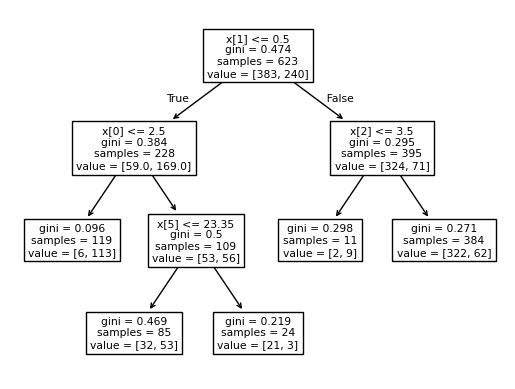

In [56]:
plot_tree(dt)

In [57]:
ypred=dt.predict(xte)


In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [59]:
print(accuracy_score(yte,ypred))
print(confusion_matrix(yte,ypred))

     

0.7910447761194029
[[144  22]
 [ 34  68]]


#### Finding Best Parameters 

In [60]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[4,6,8,10],
       'max_leaf_nodes':[3,5,7,9],
       'max_features':[0.25,0.6,1.0]}
gsv=GridSearchCV(param_grid=params,estimator=dt)

In [61]:
gsv.fit(x,y)

,estimator,DecisionTreeC..._leaf_nodes=5)
,param_grid,"{'max_depth': [4, 6, ...], 'max_features': [0.25, 0.6, ...], 'max_leaf_nodes': [3, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [64]:
gsv.best_params_

{'max_depth': 6, 'max_features': 1.0, 'max_leaf_nodes': 9}

In [63]:
gsv.best_score_

np.float64(0.8181783943255289)

### Applying PCA for plotting Graph

In [65]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [66]:
df2=pd.DataFrame()
df2[['PC1','PC2']]=pca.fit_transform(x,y)

In [68]:
df2['survived']=df['Survived'].values # 1=Survived 0=Not

In [75]:
x1=df2.drop(columns=['survived'])
y1=df2.iloc[:,-1]

In [76]:
xtr1,xte1,ytr1,yte1=train_test_split(x1,y1,test_size=0.3)

In [78]:
dt1=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=4)
dt1.fit(xtr1,ytr1)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,4
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
x_min, x_max = df2.iloc[:, 0].min() - 1, df2.iloc[:, 0].max() + 1
y_min, y_max = df2.iloc[:, 1].min() - 1, df2.iloc[:, 1].max() + 1

In [72]:
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),  
    np.linspace(y_min, y_max, 300)   
)


In [79]:
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = dt1.predict(grid_points)

Z = Z.reshape(xx.shape)

C:\Users\ACER\anaconda3\envs\AI_env1\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


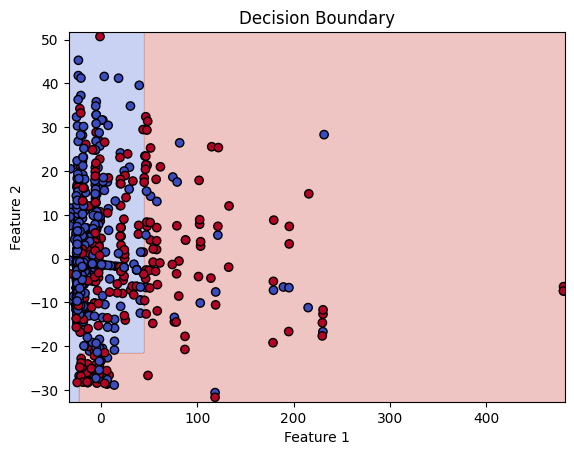

In [81]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c=y1, cmap='coolwarm', edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

#

In [82]:
print("Z unique values:", np.unique(Z))


Z unique values: [0 1]
